<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        FLIGHT FARE PREDICTION
    </h2>
    </div>

![](https://feeds.abplive.com/onecms/images/uploaded-images/2021/09/08/634259599cd6f60c24f9e67a5680c064_original.jpg)

<p>
    An airline  company provides air transport services for traveling passengers and flight. Airlines use aircraft to supply these services and may form partnerships or alliances with other airlines for codeshare agreements, in which they both offer and operate the same flight. Generally, airline companies are recognized with an air operating certificate or license issued by a governmental aviation body. Airlines may be scheduled or charter operators.</p>
    
<p>
    Airlines assign prices to their services in an attempt to maximize profitability. The pricing of airline tickets has become increasingly complicated over the years and is now largely determined by computerized yield management systems.</p>
    
<p>
    The price of an Airline Ticket is affected by a number of factors, such as flight duration, days left for departure, arrival time and departure time etc. Airline organizations may diminish the cost at the time they need to build the market and at the time when the tickets are less accessible. They may maximize the costs. As well it helps the travelers to save time and money and they can easily budget there trips. The price may relay upon different factors. Each factor has its own proprietary rules and algorithms to set the price accordingly. Recent advances in Artificial Intelligence (AI) and Machine Learning (ML) makes it possible to infer such rules and model the price variation.
    
    
</p>

### About Dataset

Link to Dataset : https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh

We have 2 datasets here — training set and test set.

The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. 

We will use Regression techniques here, since the predicted output will be a continuous value.


### Features Information

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Codes

### 1. Importing Necessary Libraries

In [1]:
# Basic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Algorithm used to build ML Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Model Evaluation 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

### 2. Loading the Dataset

In [ ]:
import io
%cd "C:\Users\hp\Desktop\Data science Full notes\ML\ML\Flight"

In [2]:
# Checking for top 5 records
train_data = pd.read_excel("Flight")
train_data.head()

NameError: name 'pd' is not defined

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see there is a missing values in Route and Total_Stops we should treat the missing values accordingly

### Now will load test data

In [7]:
test_data = pd.read_excel("Test_set.xlsx")

In [8]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### 3. EDA [Exploratory Data Analysis]

### 1.Train Datset

#### 1. Checking null values

In [10]:
#Check for null values in the dataset
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

The route and target column has 1 row where there are missing values. Checking which row it is.

In [11]:
train_data[(train_data['Total_Stops'].isnull()) | (train_data['Total_Stops'].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In the same row we have both the missing values. Will fill this missing value once feature engineering is completed.

#### 2. Checking for Duplicates

In [12]:
# Select duplicate rows except first occurrence based on all columns
duplicateRows = train_data[train_data.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :",duplicateRows.shape)

Total Duplicate Rows except first occurrence based on all columns are : (220, 11)


In [13]:
#remove duplicate rows in training dataset, by keeping first occurence
train_data.drop_duplicates(keep='first',inplace=True)

In [14]:
train_data.shape

(10463, 11)

we can see after removing duplicated data the shape of the data is reduced from 10683 to 10463

#### 3. Feature Engineering

###### 1. Date_of_Journey column

Since the Date_of_Journey column contains Object datatype we need to convert them to timestamp inorder to use them in our analysis.

In [15]:
# Will check for datatype
train_data.Date_of_Journey.dtype

dtype('O')

In [16]:
# Will check 1 record to know how the data looks like
train_data.Date_of_Journey[0]

'24/03/2019'

#### Now we can extract only date from the Date_of_Journey

In [17]:
train_data["Date"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

#### Now we can extract only Month from the Date_of_Journey

In [18]:
train_data["Month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

#### Now we can extract only Year from the Date_of_Journey

In [19]:
train_data["Year"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.year

In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  Date             10463 non-null  int64 
 12  Month            10463 non-null  int64 
 13  Year             10463 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.4+ MB


In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


As we have extracted Date, Month and Year from Date_of_Journey column, So no need to keep Date_of_Journey column we can drop it

In [22]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

#### 2. Departure Time

Similar to Date_of_Journey we can extract values of hour and minute from Dep_Time

In [23]:
train_data["Dep_Time"].dtype

dtype('O')

In [24]:
train_data["Dep_Time"][0]

'22:20'

#### Now we can extract only Horus from the Dep_Time

In [25]:
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

#### Now we can extract only Minutes from the Dep_Time

In [26]:
train_data["Dep_minutes"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

As we have extracted Horus and Minutes from Dep_Time column, So no need to keep Dep_Time column we can drop it

In [27]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


#### 3. Arrival Time

Similar to departure time, we can extract values from arrival time

In [29]:
# Extracting Hours from Arrival Time
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes from Arrival Time
train_data["Arrival_minutes"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Droping Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


#### 4.Duration

In [31]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data['Duration'])


for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Checking if the duration contains only hours or mins
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  # if it is in hr then i am adding 0mins
        else:
            duration[i] = '0h ' + duration[i]          # if it is not in hr then i am adding 0h before min
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))    # Extracting hours from duration
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))       # Extractig only minutes from the duration

In [32]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [33]:
# Now we can drop the duration column because it is no more useful
train_data.drop(['Duration'],axis = 1, inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


### 4. Handling Categorical Data and Categorical Data Visualizations

1. **Nominal Data** ---> Data are not in any order  ---> OneHotEncoder will be used in this case
2. **Ordinal Data** ---> Data are in order  ---> LabelEncoder is used in this case

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [36]:
train_data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10463, dtype: object

### Now will try to extract most busiest routes

In [37]:
# Most Busiest routes

busy_routes = train_data.Route.value_counts().reset_index().set_index('index')
busy_routes = busy_routes.head()
busy_routes

,Route
index,
DEL → BOM → COK,2376
BLR → DEL,1536
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621


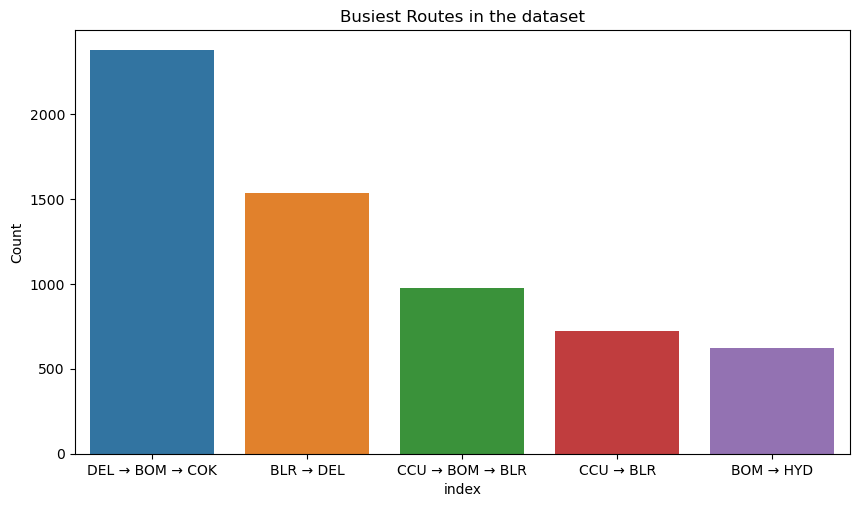

In [38]:
# Let me plot this in pictorical format

plt.figure(figsize=(10,5.5))
sns.barplot(x=busy_routes.index,y=busy_routes.Route)
plt.title('Busiest Routes in the dataset')
plt.ylabel('Count')
plt.show()

Delhi to Cochin via Mumbai is the Busiest route with 2376 flights, Followed by Bangalore to Delhi.

In [39]:
train_data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25


In [40]:
# Route and Total_Stops are related to each other so we are dropping route
#Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected so we can drop Routes variable.
train_data.drop(["Route"], axis = 1, inplace = True)

In [41]:
# Checking categorical variables
df_categorical_features = train_data.select_dtypes(include='object')
df_categorical_features.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

### Now will perform countplot for all the categorical features

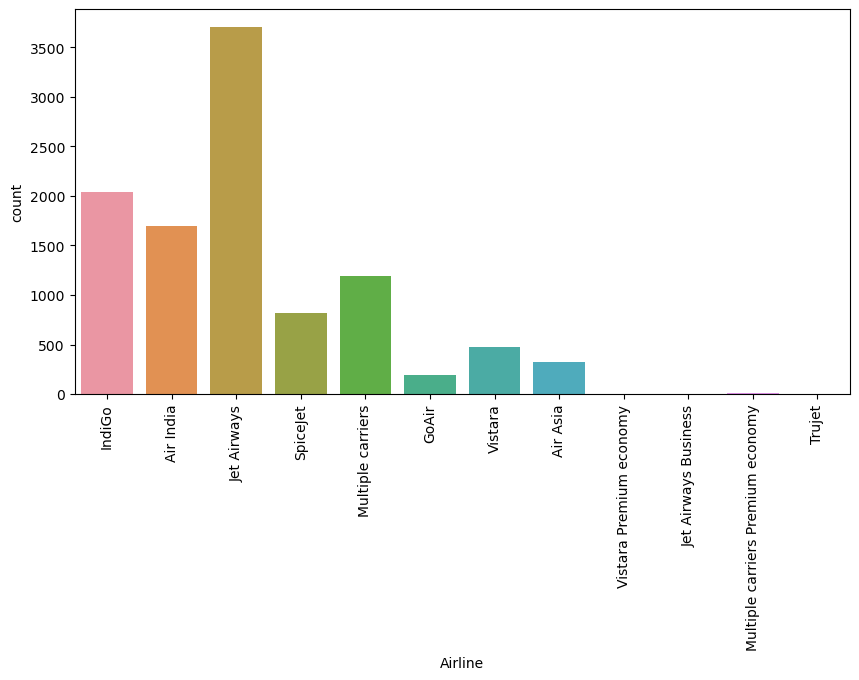

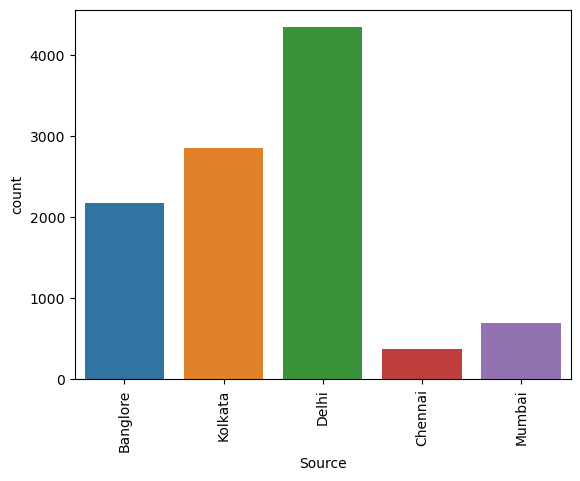

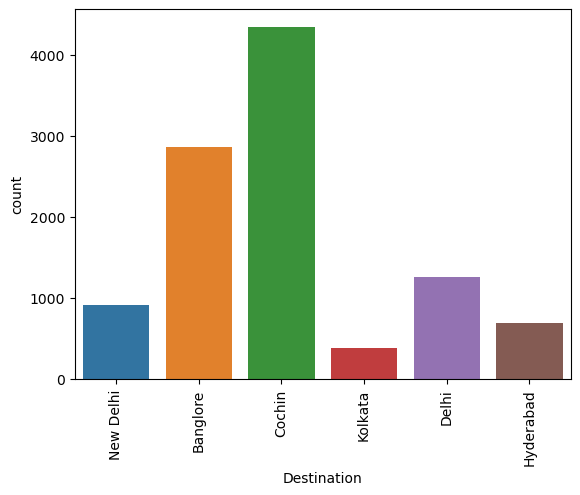

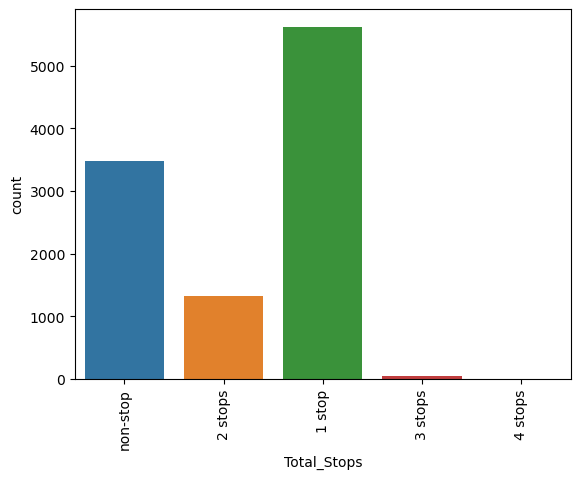

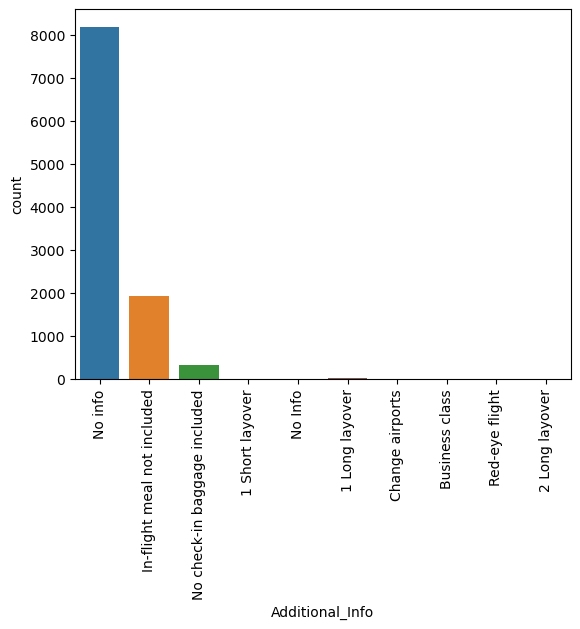

In [42]:
plt.figure(figsize=(10,5))
for i in df_categorical_features.columns:
    sns.countplot(train_data[i])
    plt.xticks(rotation = 90)
    plt.show()

will try to find the insights from the above plots

**Airline**

1. Jet Airways is the most preferred airline with the highest records, which are followed by Indigo and Air India airline.
2. Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

**Source**

1. Majority of the flights take off from Delhi
2. Chennai has the minimum number of flight take-offs

**Destination**

1. Maximum flights land in Cochin
2. Kolkata has the lowest count of receiving the flights

**Total Stops**

Majority of the flights have stops as 1, flights wiht 3 and 4 stops are quite low

**Additional Info**

Maximum rows have No info as the value.

#### We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.

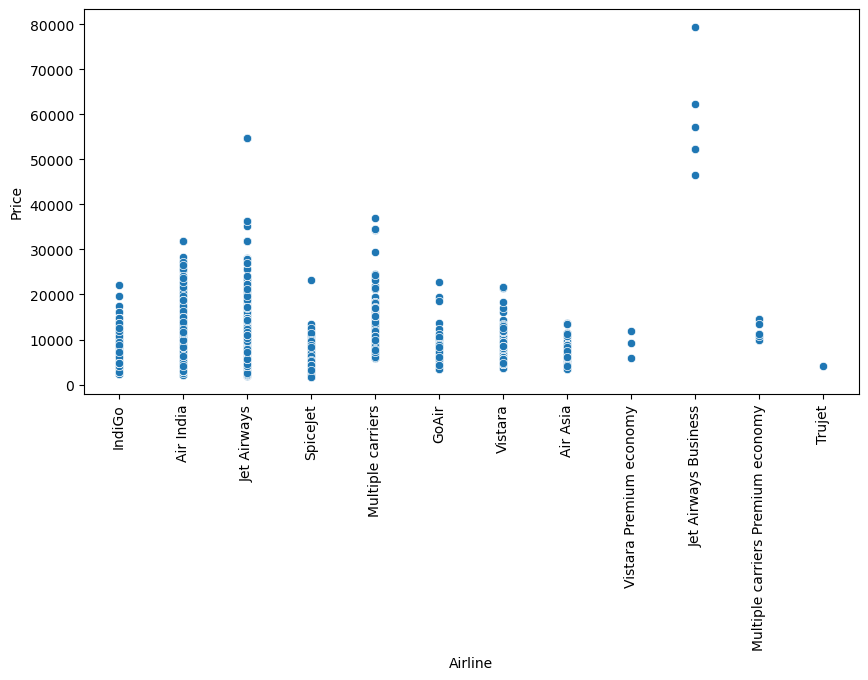

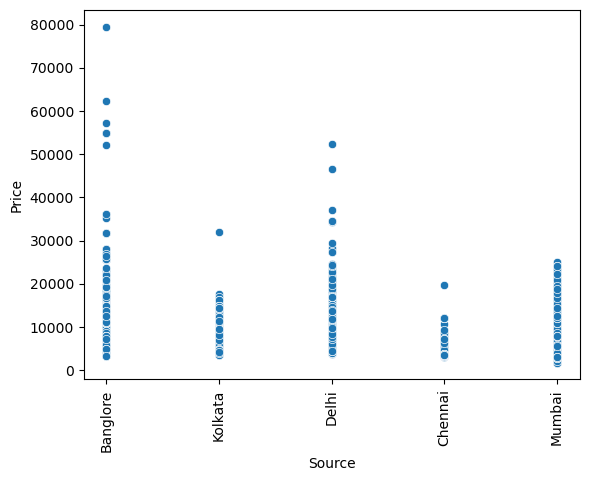

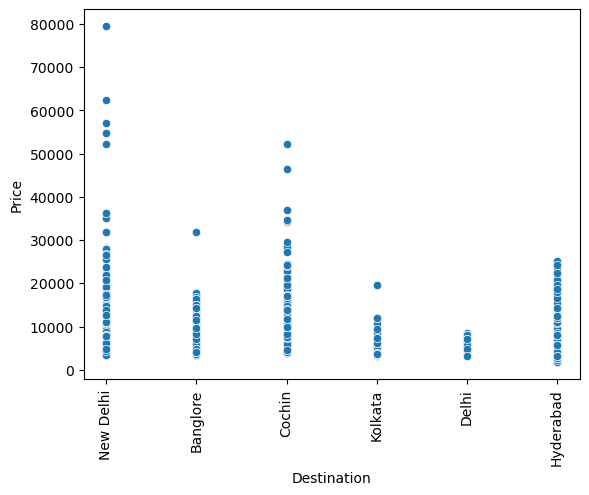

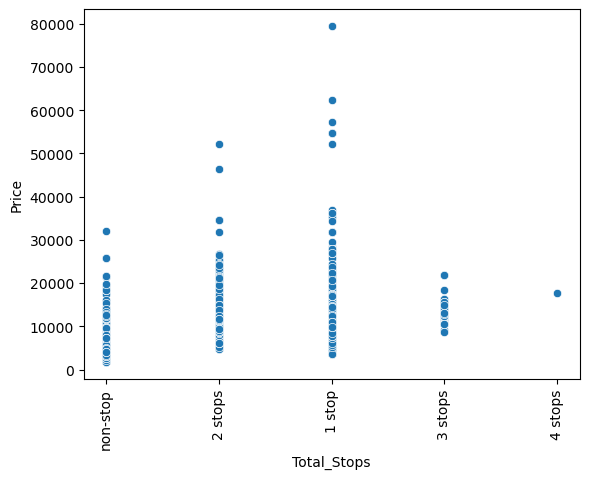

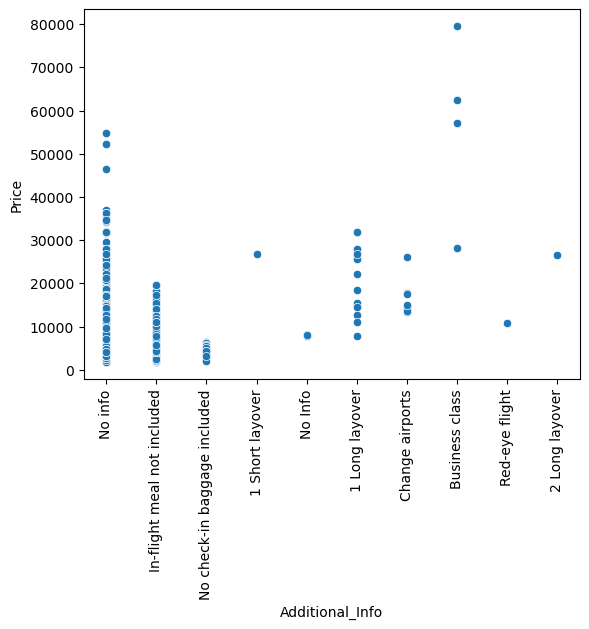

In [43]:
plt.figure(figsize=(10,5))
for i in df_categorical_features:
    sns.scatterplot(x=train_data[i],y=train_data.Price)
    plt.xticks(rotation = 90)
    plt.show()

will try to find the insights from the above plots

1. Jet airways business class has the highest prices between 50k — 80k

2. All the high cost flights depart from bangalore, rest of the flights have prices between 3k — 50k

3. All high cost flights have destination as Delhi, rest of the flights have prices between 3k — 50k

4. The flights with high prices having 1 stop.

5. If a flight is of business class, its price would be high


We have quite less data where prices are higher than 50k. We check these rows once –

In [44]:
train_data[train_data.Price>50000]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
657,Jet Airways Business,Banglore,New Delhi,1 stop,No info,52229,1,3,2019,5,45,10,45,5,0
1478,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,2019,18,40,0,45,6,5
2618,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,18,3,2019,22,50,5,5,6,15
2924,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,79512,1,3,2019,5,45,11,25,5,40
5372,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,62427,1,3,2019,5,45,12,25,6,40
5439,Jet Airways,Banglore,New Delhi,1 stop,No info,54826,1,3,2019,16,55,23,0,6,5
9715,Jet Airways Business,Delhi,Cochin,2 stops,No info,52285,6,3,2019,20,5,4,25,8,20
10364,Jet Airways Business,Banglore,New Delhi,1 stop,Business class,57209,1,3,2019,9,45,14,25,4,40


We make the below observations –

- We observe that the flights with high prices are 8 in number.

- Majority of the flights belong to Business class

- All the flights have Airlines as Jet airways Business.

- All of these flights took flight in March

In [45]:
# As total stops is a Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [46]:
# More than 80 % of data in additional info is no info so we are dropping it

train_data.drop([ "Additional_Info"], axis = 1, inplace = True)

In [47]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1.0,13302,1,3,2019,16,50,21,35,4,45


#### 5.Treating Missing Values

In [48]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
9039,Air India,Delhi,Cochin,NaN,7480,6,5,2019,9,45,9,25,23,40


In [49]:
# Filtering data with missing value and filling up with appropriate values as determined
train_data.loc[(train_data.Airline=='Air India')&(train_data.Source=='Delhi') & (train_data.Destination=='Cochin') & (train_data.Price==7480) & ((train_data['Month'])==5) & ((train_data['Duration_hours'])==23) & ((train_data['Duration_mins'])==40)]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
1616,Air India,Delhi,Cochin,1.0,7480,24,5,2019,9,45,9,25,23,40
2554,Air India,Delhi,Cochin,1.0,7480,15,5,2019,9,45,9,25,23,40
9039,Air India,Delhi,Cochin,NaN,7480,6,5,2019,9,45,9,25,23,40


In [50]:
# So we can see that most of the data tells that the total_stops = 1 with same info, So i am replacing the null values with 1

train_data.loc[train_data.Total_Stops.isnull(),'Total_Stops'] = 1

In [51]:
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Price              0
Date               0
Month              0
Year               0
Dep_hour           0
Dep_minutes        0
Arrival_hour       0
Arrival_minutes    0
Duration_hours     0
Duration_mins      0
dtype: int64

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10463 non-null  object 
 1   Source           10463 non-null  object 
 2   Destination      10463 non-null  object 
 3   Total_Stops      10463 non-null  float64
 4   Price            10463 non-null  int64  
 5   Date             10463 non-null  int64  
 6   Month            10463 non-null  int64  
 7   Year             10463 non-null  int64  
 8   Dep_hour         10463 non-null  int64  
 9   Dep_minutes      10463 non-null  int64  
 10  Arrival_hour     10463 non-null  int64  
 11  Arrival_minutes  10463 non-null  int64  
 12  Duration_hours   10463 non-null  int64  
 13  Duration_mins    10463 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 1.4+ MB


#### 6.Checking the relation of ‘Price’ column with numerical data

In [53]:
# Checking numeric variables
df_numeric_features = train_data.select_dtypes(exclude=object)
df_numeric_features.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'Year', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

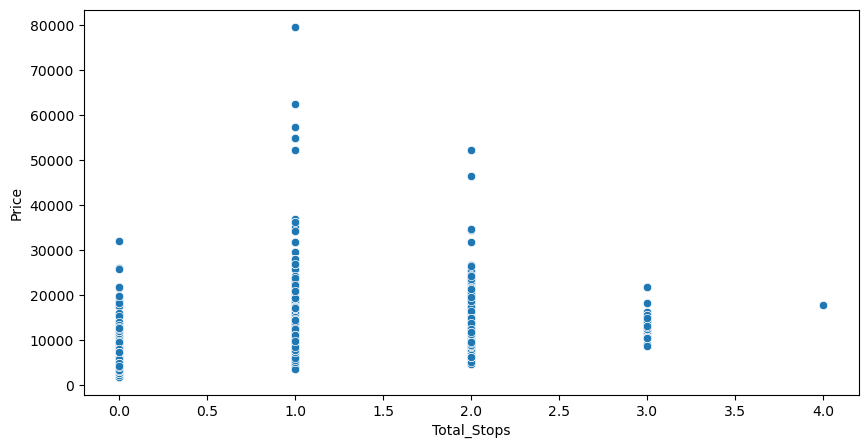

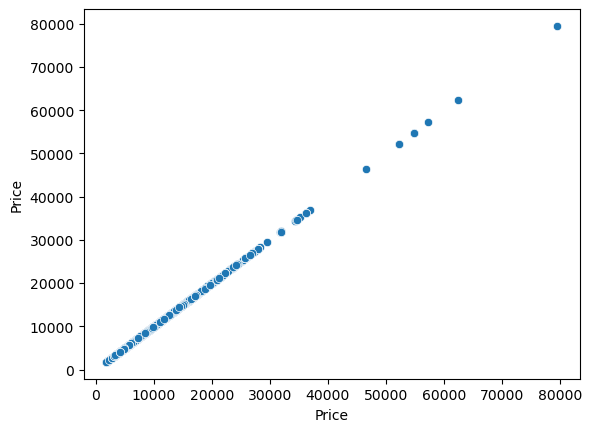

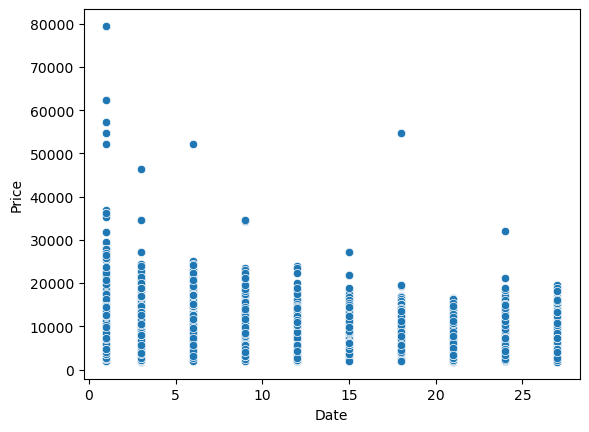

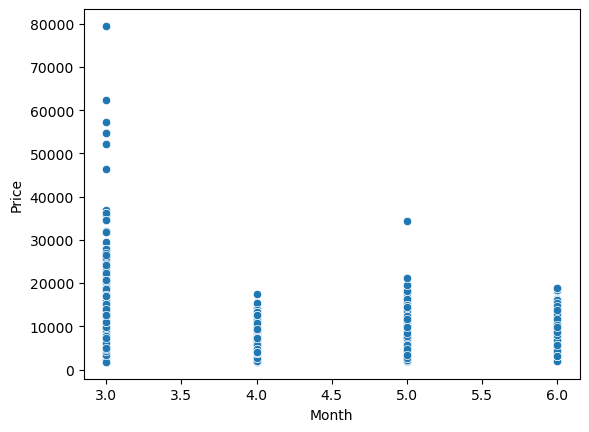

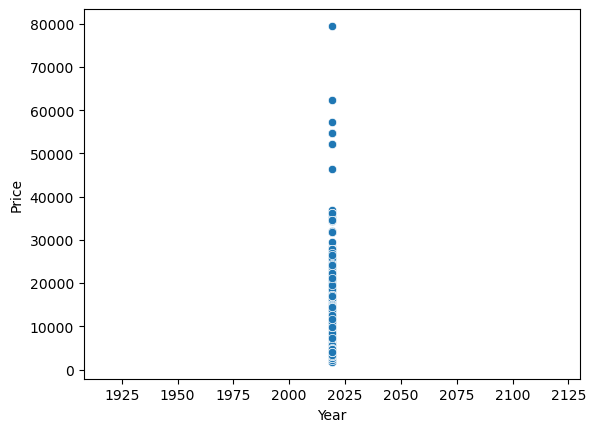

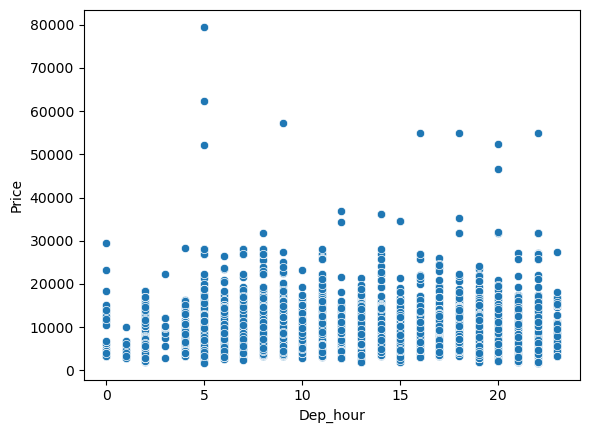

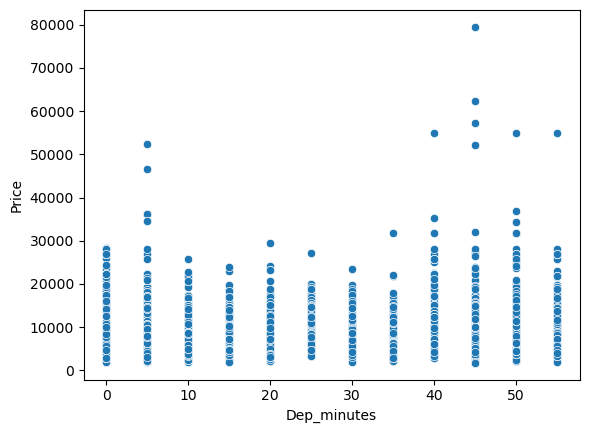

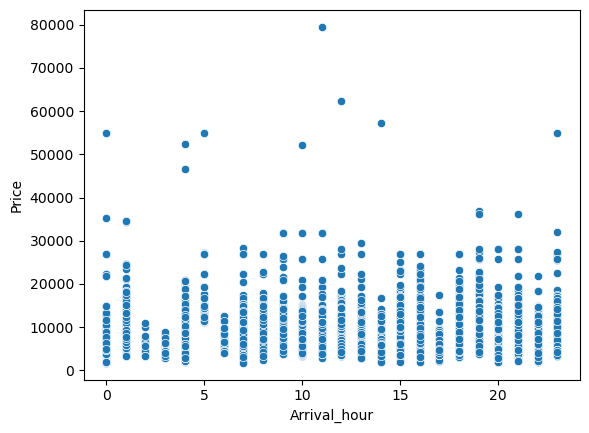

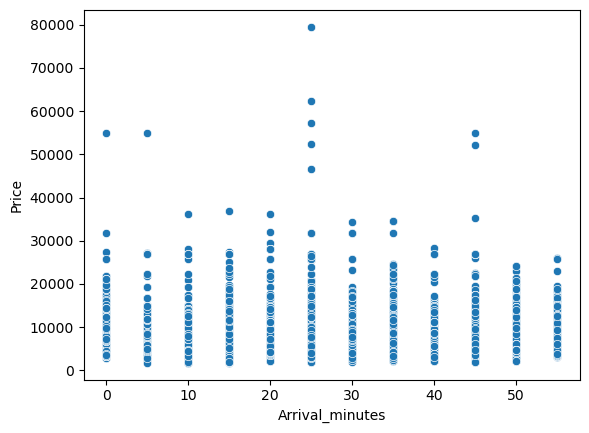

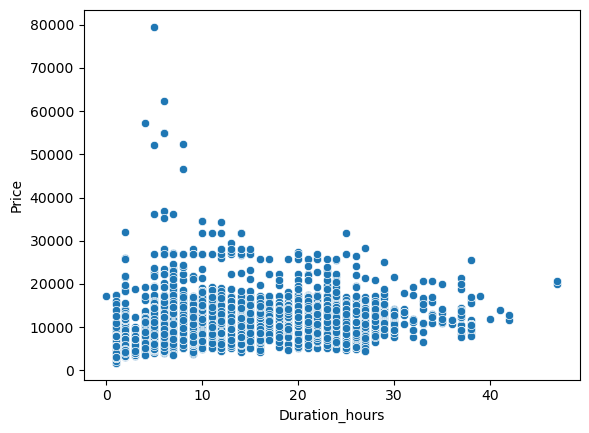

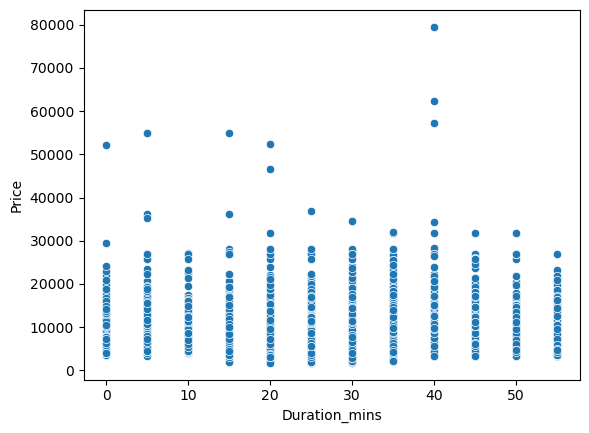

In [54]:
plt.figure(figsize=(10,5))
for i in df_numeric_features.columns:
    sns.scatterplot(x=train_data[i],y=train_data.Price)
    plt.show()

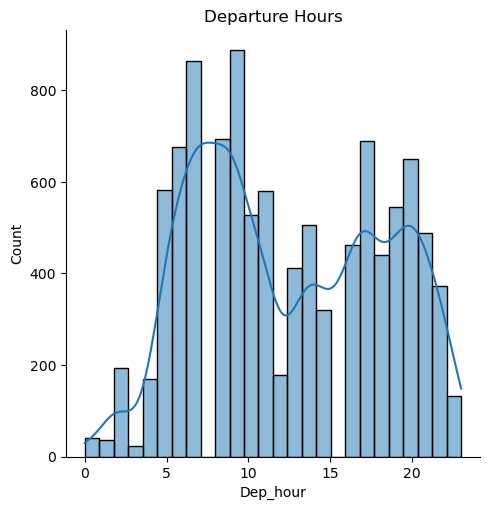

In [62]:
sns.displot(x=train_data['Dep_hour'], data=train_data, kde=True)
plt.title('Departure Hours')
plt.show()

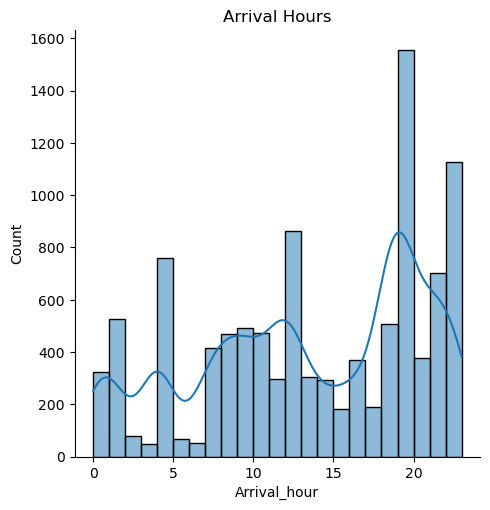

In [63]:
sns.displot(x=train_data['Arrival_hour'], data=train_data, kde=True)
plt.title('Arrival Hours')
plt.show()

We observe that –

- As number of stops increase, the price range gets decreasing into a smaller price window (10k — 22k)

- High price flights are lesser during end of month

- Prices are higher in the month of March

- Prices are high if flight is departing in the morning and evening.

- Prices are high if arrival time is in the afternoon 

- With increase in travel hours, price decreases

- Most Flight depart during morning hours

- Most Flight arrive in the evening hours

#### 7. Checking Outliers

In [64]:
train_data.describe()

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
count,10463.000000,10463.000000,10463.000000,10463.00000,10463.0,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,0.802351,9026.642454,13.462487,4.70152,2019.0,12.478161,24.406958,13.387269,24.719966,10.027430,28.211316
std,0.660580,4624.653227,8.467403,1.16375,0.0,5.727055,18.815897,6.855353,16.569658,8.378582,16.878771
min,0.000000,1759.000000,1.000000,3.00000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5224.000000,6.000000,3.00000,2019.0,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8266.000000,12.000000,5.00000,2019.0,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12343.500000,21.000000,6.00000,2019.0,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.00000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


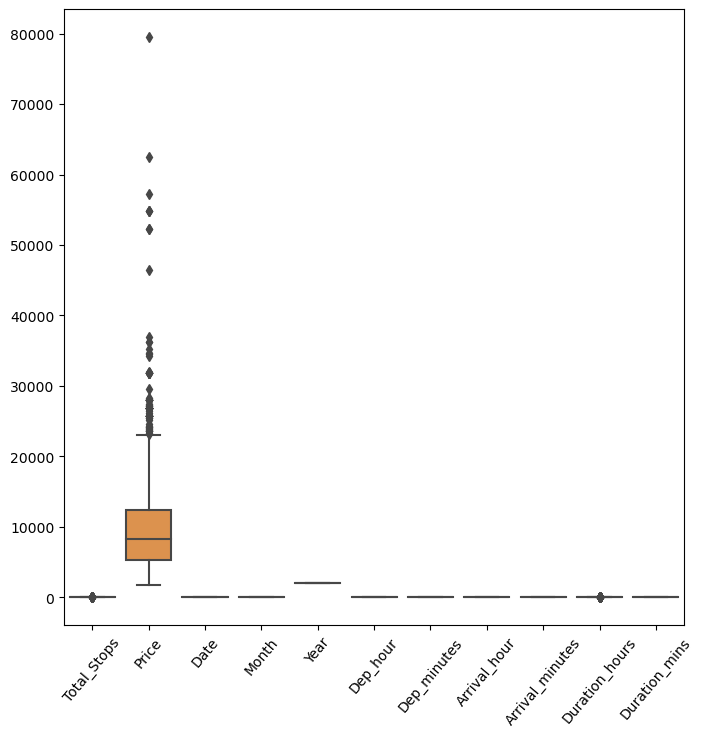

In [66]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train_data)
plt.xticks(rotation=50)
plt.show()

By seeing above graph we can state that--

- Outliers are present in Total_stops, Price, Duration_hours
- We will not remove outliers from total stops since price is impacted by number of stops
- Duration hours also show a relationship with target column so we are not removing it's outliers
- High Priced Ticket such as that of a business class. These prices aren’t removed as this extreme value is a legitimate observation.

<AxesSubplot:xlabel='Duration_hours'>

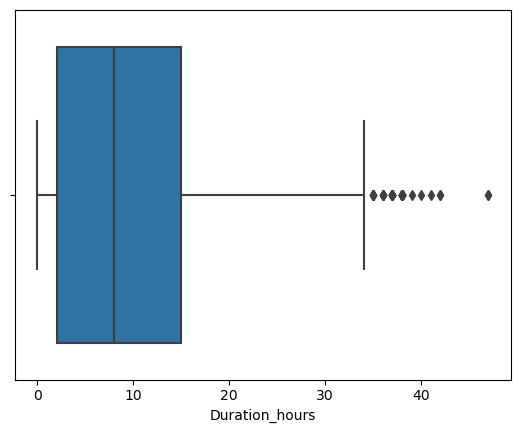

In [68]:
sns.boxplot(train_data.Duration_hours)

In [69]:
train_data[(train_data['Duration_hours']<1) & (train_data['Duration_mins']<15)]

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
6474,Air India,Mumbai,Hyderabad,2.0,17327,6,3,2019,16,50,16,55,0,5


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot fly from mumbai to hyderabad with 2 stops in 5 min. So we are dropping this row.

In [73]:
train_data.drop(index=6474,inplace=True,axis=0)

#### Checking for Assemptions of Linear Regression

#### 1. Linearity 

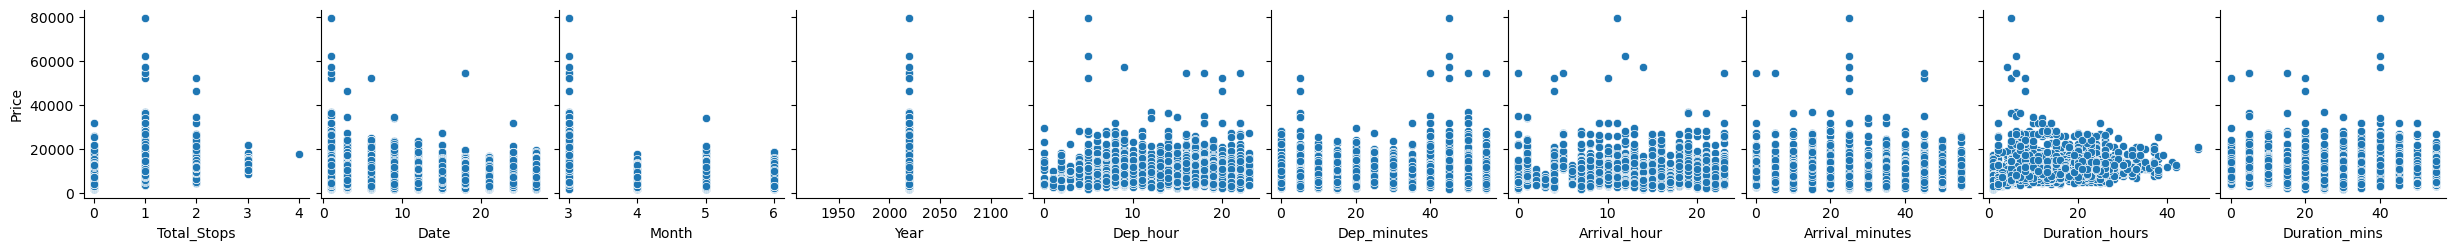

In [78]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(train_data, x_vars=['Total_Stops', 'Date', 'Month', 'Year', 'Dep_hour','Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours','Duration_mins'], y_vars='Price')

By looking at the above plots  we can observe that there is no linear relationship between dependent and independent Variable

#### Checking Correlation

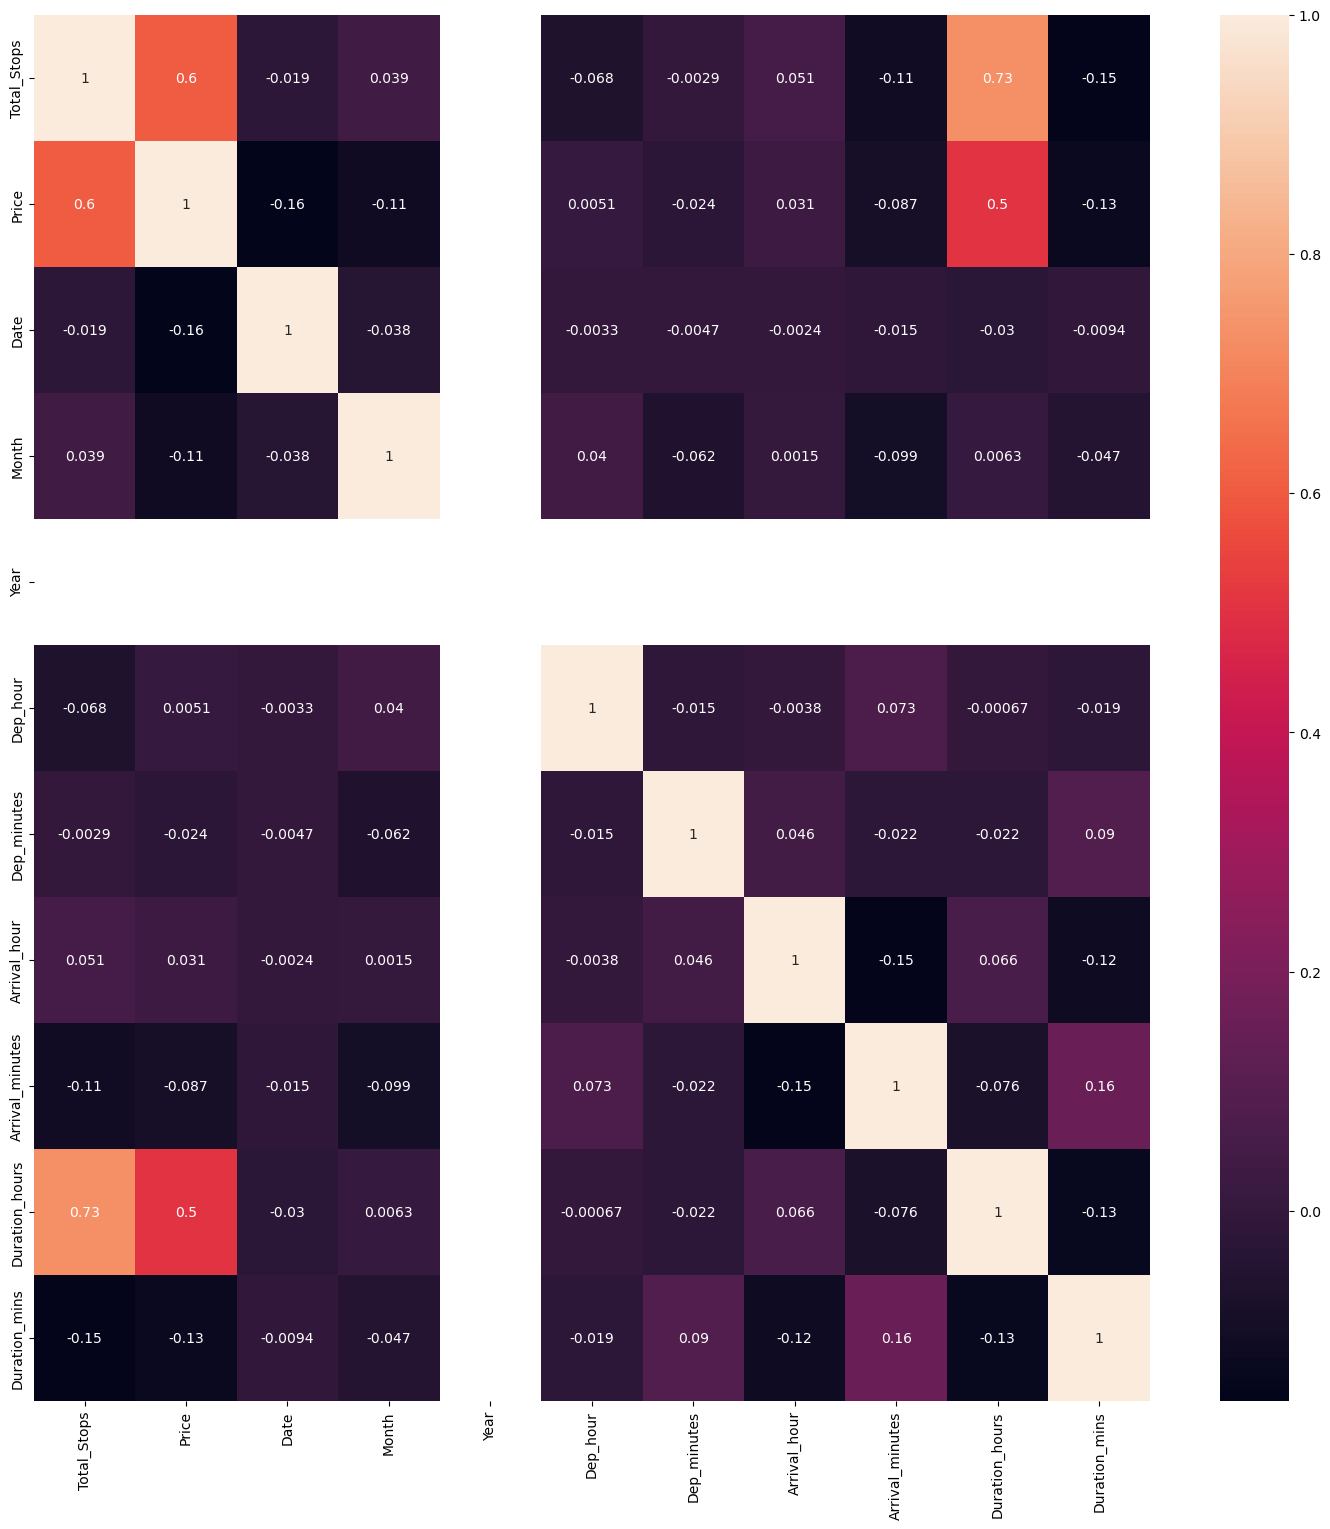

In [81]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

#### We can see there is correlation between duration_hour and total stops, we will do feature selection later in order to find which is the important variable

### Test for Normality

In [82]:
from scipy import stats
# extract the price column as a numpy array
prices = train_data['Price'].values

# perform Shapiro-Wilk test for normality
stat, p = stats.shapiro(prices)

# interpret test results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


Since the data is not gaussian, so we can understand that parametric model like linear regression won't give good accuracy with it.

#### 10.Dummy Encoding for rest of categorical columns

In [83]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0.0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,2019,5,50,13,15,7,25


The rest 3 object columns are nominal columns so we are applying one hot encoding so as to convert it into number column

In [84]:
# Before Performing encoding will backup the data into data_train
data_train=train_data.copy()

In [94]:
train_data = data_train.copy()

In [95]:
train_data=pd.get_dummies(train_data,drop_first=True)

In [96]:
train_data.shape

(10462, 31)

In [97]:
train_data.head()

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [98]:
train_data.head()

,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,3897,24,3,2019,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,2019,5,50,13,15,7,...,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,2019,9,25,4,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,2019,18,5,23,30,5,...,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,2019,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


#### Train data is fully cleaned up will perform the same cleaning for test data

### Now will check with Test data

In [99]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [100]:
# Preprocessing as in train data


print(test_data.info())
print()

#treating null values
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Datey"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data["Year"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_minutes"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_minutes"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())


print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())


print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())


# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

data_test=pd.get_dummies(test_data,drop_first=True)

print("Shape of test data : ", data_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
-------------------------------------------------------------------------

In [101]:
data_test.head()

,Total_Stops,Datey,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,6,17,30,4,25,10,55,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,5,6,20,10,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,5,19,15,19,0,23,45,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,5,8,0,21,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,6,23,55,2,45,2,50,...,0,0,0,0,0,0,1,0,0,0


In [103]:
print(train_data.shape,data_test.shape)

(10462, 31) (2671, 29)


In [104]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int64
 1   Datey                                      2671 non-null   int64
 2   Month                                      2671 non-null   int64
 3   Year                                       2671 non-null   int64
 4   Dep_hour                                   2671 non-null   int64
 5   Dep_minutes                                2671 non-null   int64
 6   Arrival_hour                               2671 non-null   int64
 7   Arrival_minutes                            2671 non-null   int64
 8   Duration_hours                             2671 non-null   int64
 9   Duration_mins                              2671 non-null   int64
 10  Airline_Air India                          2671 

In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10462 non-null  float64
 1   Price                                      10462 non-null  int64  
 2   Date                                       10462 non-null  int64  
 3   Month                                      10462 non-null  int64  
 4   Year                                       10462 non-null  int64  
 5   Dep_hour                                   10462 non-null  int64  
 6   Dep_minutes                                10462 non-null  int64  
 7   Arrival_hour                               10462 non-null  int64  
 8   Arrival_minutes                            10462 non-null  int64  
 9   Duration_hours                             10462 non-null  int64  
 10  Duration_mins         

### 4. Feature Selection

In [106]:
X=train_data.drop(['Price'],axis=1)
X.head()

,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2.0,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1.0,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [107]:
y = train_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [108]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [109]:
print(selection.feature_importances_)

[2.19589753e-01 1.44888615e-01 5.25820650e-02 0.00000000e+00
 2.49126061e-02 2.12162568e-02 2.83225460e-02 1.90572662e-02
 1.18296080e-01 1.71719642e-02 1.05514669e-02 1.77551288e-03
 1.23656313e-02 1.39867014e-01 6.93505765e-02 2.25289927e-02
 8.79509888e-04 2.39045630e-03 1.00759232e-04 5.01301538e-03
 8.30012554e-05 5.95449632e-04 1.34197382e-02 3.10693945e-03
 6.79477165e-03 1.26277020e-02 1.86006715e-02 7.99551584e-03
 5.06340022e-04 2.54097833e-02]


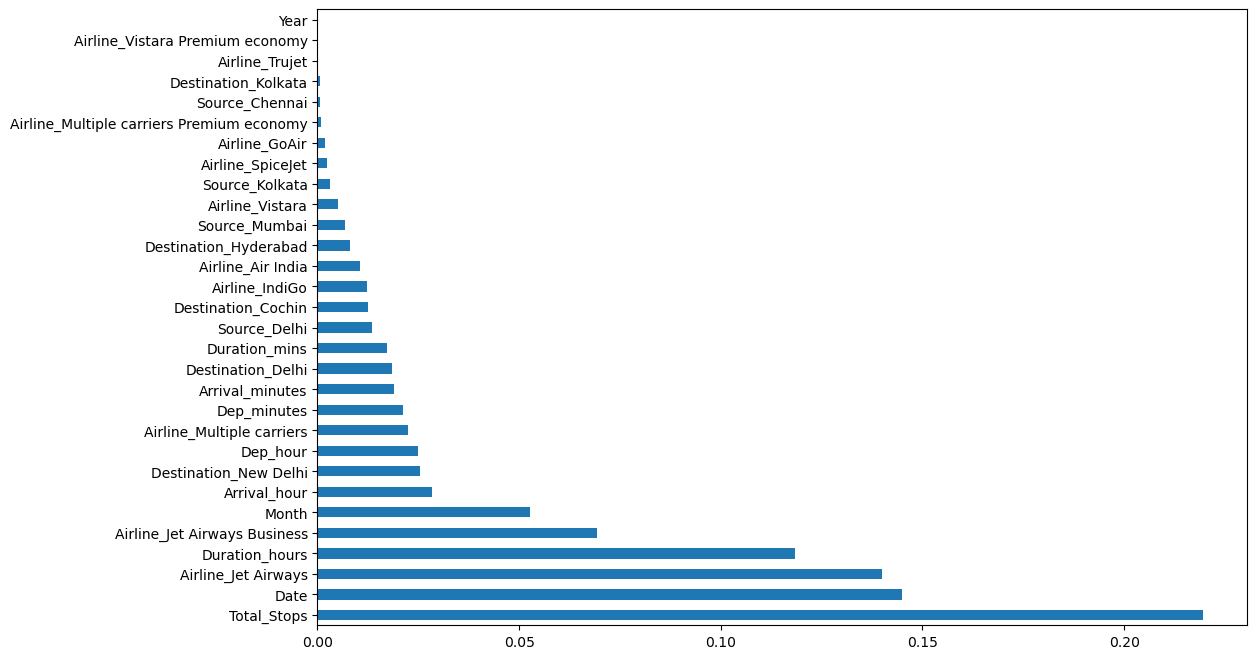

In [112]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(31).plot(kind='barh')
plt.show()

In [113]:
feat_importances.index

Index(['Total_Stops', 'Date', 'Month', 'Year', 'Dep_hour', 'Dep_minutes',
       'Arrival_hour', 'Arrival_minutes', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

Will used the 14 most important features for model building

### 5. Model Building

#### 1.Splitting the data into train and test data set

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X[feat_importances.nlargest(14).index],y,test_size=0.20,random_state=1)

In [116]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8369, 14), (2093, 14), (8369,), (2093,))

#### 2.Scaling the data

In [117]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

#### 3.Model Application

### Now will try to build with various model like linear regression, Decision Tree, Randomforest etc

In [118]:
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]

In [123]:

for i in range(3):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred_train=models[i].predict(X_train_scaled)
    y_pred_test=models[i].predict(X_test_scaled)
    
    print('MSE_train: ',mean_squared_error(y_train,y_pred_train))
    print('MSE_test: ',mean_squared_error(y_test,y_pred_test))
    
    print('RMSE_train: ',np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print('RMSE_test: ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    print('R2_score_train: ',r2_score(y_train,y_pred_train))
    print('R2_score_test: ',r2_score(y_test,y_pred_test))
    
    print()
    print('--'*55)

LinearRegression(): 
MSE_train:  8477072.607833238
MSE_test:  8372192.543190998
RMSE_train:  2911.54127702721
RMSE_test:  2893.4741303821947
R2_score_train:  0.6043406135552127
R2_score_test:  0.6051360194552928

--------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(): 
MSE_train:  676787.2369398972
MSE_test:  6781727.0385857625
RMSE_train:  822.6707949963321
RMSE_test:  2604.174924728706
R2_score_train:  0.968411592620563
R2_score_test:  0.6801483339508819

--------------------------------------------------------------------------------------------------------------
RandomForestRegressor(): 
MSE_train:  1050387.3447477256
MSE_test:  4466636.5091538625
RMSE_train:  1024.8840640519911
RMSE_test:  2113.4418632065235
R2_score_train:  0.9509741591727994
R2_score_test:  0.7893366806183624

--------------------------------------------------------------------------------------------------------------


#### Random Forest had the best accuracy based on training and test dataset but it is overfitted so we need to perfrom some hyper parameter tuning technique

#### 4.Hypertuning the model

In [124]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [125]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [126]:
from sklearn.model_selection import RandomizedSearchCV

rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_grid,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, verbose=2)

In [127]:
# best parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [132]:
#predicting the values
trian_pred=rf_model.predict(X_train_scaled)
test_pred=rf_model.predict(X_test_scaled)

print('R2 score of training dataset',r2_score(y_train,trian_pred))
print('R2 score of testing dataset',r2_score(y_test,test_pred))

R2 score of training dataset 0.9133246618401728
R2 score of testing dataset 0.8119725415757031


In [133]:
from sklearn.metrics import mean_absolute_error
print('r2 score train', r2_score)
print('r2_score test:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2 score train <function r2_score at 0x0000013464A15F70>
r2_score test: 0.8119725415757031
MAE: 1202.6727506635145
MSE: 3986694.5654639667
RMSE: 1996.6708705903352


After hypertuning,the accuracy of random forest increases .